In [84]:
import os

In [85]:
pwd

'C:\\Users\\reliance digital\\OneDrive\\Documents\\python\\jupyter'

In [86]:
os.chdir('C:\\Users\\reliance digital\\OneDrive\\Documents\\python\\jupyter')

In [87]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
#importing the train set
data=pd.read_csv('train.csv')
#here x is the input set and y is the output set
x=data.drop(columns=['is_promoted'])
y=data['is_promoted']
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [88]:
x=x.fillna(0)
#converting string into numeric using  frequency encoding method
#first we make a dictonary that maps each label to the count
#and we replace labels in the input data set x
gender=x.gender.value_counts().to_dict()
x.gender=x.gender.map(gender)
department=x.department.value_counts().to_dict()
x.department=x.department.map(department)
region=x.region.value_counts().to_dict()
x.region=x.region.map(region)
education=x.education.value_counts().to_dict()
x.education=x.education.map(education)
recruitment_channel=x.recruitment_channel.value_counts().to_dict()
x.recruitment_channel=x.recruitment_channel.map(recruitment_channel)
x

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,16840,4843,14925,16312,23220,1,35,5.0,8,1,0,49
1,65141,11348,6428,36669,38496,30446,1,30,5.0,4,0,0,60
2,7513,16840,874,36669,38496,23220,1,34,3.0,7,0,0,50
3,2542,16840,1175,36669,38496,30446,2,39,1.0,10,0,0,50
4,48945,7138,2260,36669,38496,30446,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,7138,827,36669,38496,23220,1,48,3.0,17,0,0,78
54804,74592,11348,1659,14925,16312,30446,1,37,2.0,6,0,0,56
54805,13918,5352,610,36669,38496,30446,1,27,5.0,3,1,0,79
54806,13614,16840,420,2409,38496,23220,1,29,1.0,2,0,0,45


In [89]:
x=x.fillna(0)
#training model by taking depth 2
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,prediction)
print("Accuracy=",score*100,"%")

Accuracy= 89.098704615946 %


In [90]:
#training model by taking depth 3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
prediction=model2.predict(x_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,prediction)
print("Accuracy=",score*100,"%")

Accuracy= 89.47880557075959 %


In [91]:
#training model by taking depth 4
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
prediction=model3.predict(x_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,prediction)
print("Accuracy=",score*100,"%")

Accuracy= 89.55938697318008 %


In [92]:
#training model by taking depth 5
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
prediction=model3.predict(x_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,prediction)
print("Accuracy=",score*100,"%")

Accuracy= 89.51612903225806 %


In [93]:
# training the model on training set for Gaussian Naive Bayes Method
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(x_test)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 90.69478908188586


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[24763,   298],
       [ 2252,    91]], dtype=int64)

In [95]:
#implementing precision recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     25061
           1       0.23      0.04      0.07      2343

    accuracy                           0.91     27404
   macro avg       0.58      0.51      0.51     27404
weighted avg       0.86      0.91      0.88     27404



In [96]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

avg_training_score      0.268713
employee_id             0.199386
department              0.106822
age                     0.101145
region                  0.071119
length_of_service       0.068465
KPIs_met >80%           0.043352
previous_year_rating    0.038698
recruitment_channel     0.024221
awards_won?             0.024147
education               0.019110
no_of_trainings         0.018166
gender                  0.016654
dtype: float64

No handles with labels found to put in legend.


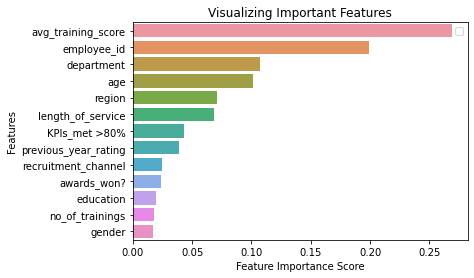

In [97]:
#To visualize the feature importance in decision tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
data1=pd.read_csv('test.csv')
data1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [99]:
data1=data1.fillna(0)
department=data1.department.value_counts().to_dict()
data1.department=data1.department.map(department)
region=data1.region.value_counts().to_dict()
data1.region=data1.region.map(region)
education=data1.education.value_counts().to_dict()
data1.education=data1.education.map(education)
gender=data1.gender.value_counts().to_dict()
data1.gender=data1.gender.map(gender)
recruitment_channel=data1.recruitment_channel.value_counts().to_dict()
data1.recruitment_channel=data1.recruitment_channel.map(recruitment_channel)
data1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,3011,1011,15578,16596,9961,1,24,0.0,1,1,0,77
1,74430,1085,775,15578,6894,13078,1,31,3.0,5,0,0,51
2,72255,7315,1167,15578,16596,13078,1,31,1.0,4,0,0,47
3,38562,3020,5299,15578,6894,13078,3,31,2.0,9,0,0,65
4,64486,1091,414,15578,16596,9961,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,445,5299,374,16596,9961,1,24,3.0,1,0,0,61
23486,25600,3011,337,15578,16596,9961,1,31,3.0,7,0,0,74
23487,45409,1085,590,15578,6894,9961,1,26,4.0,4,0,0,50
23488,1186,3020,844,15578,16596,9961,3,27,0.0,1,0,0,70


In [100]:
#gbn is the Gaussian Naive Bayes  model which has given high accuracy
#using gbn model we are predicting the test set output  
prediction=gnb.predict(data1)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
#converting array into dataframe
b=pd.DataFrame(prediction)
b

,0
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [103]:
k=pd.DataFrame(prediction)
#selecting the employee_id from the input data set
j=data1['employee_id']
#merging the enrollee_id column and prediction output then making a new data frame.
h=pd.concat([j,k],axis=1)
h.columns={'employee_id','is_promoted'}
h

,is_promoted,employee_id
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [104]:
h.to_csv('sample_submission1.csv',index=False)